**Import libraries**

In [1]:
library(dplyr)
library(summarytools)
library(neuralnet)
library(ggplot2)
library(naniar)
library(GGally)
library(caret)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“no DISPLAY variable so Tk is not available”
system might not have X11 capabilities; in case of errors when using dfSummary(), set st_options(use.x11 = FALSE)


Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




**Deriving dataset path**

In [2]:
list.files(path = "../input")
df = read.csv('../input/pima-indians-diabetes-database/diabetes.csv')

[1] "pima-indians-diabetes-database"

In [3]:
head(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [4]:
tail(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
763,9,89,62,0,0,22.5,0.142,33,0
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1
768,1,93,70,31,0,30.4,0.315,23,0


In [5]:
str(df)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [6]:
dim(df)

[1] 768   9

In [7]:
table(is.na(df))


FALSE 
 6912 

**Descriptives**

In [8]:
descr(df,style='rmarkdown')

,Age,BloodPressure,BMI,DiabetesPedigreeFunction,Glucose,Insulin,Outcome,Pregnancies,SkinThickness
Mean,33.24088542,69.10546875,31.99257813,0.47187630,120.89453125,79.79947917,0.34895833,3.84505208,20.53645833
Std.Dev,11.76023154,19.35580717,7.88416032,0.33132860,31.97261820,115.24400235,0.47695138,3.36957806,15.95221757
Min,21.00000000,0.00000000,0.00000000,0.07800000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Q1,24.00000000,62.00000000,27.30000000,0.24350000,99.00000000,0.00000000,0.00000000,1.00000000,0.00000000
Median,29.00000000,72.00000000,32.00000000,0.37250000,117.00000000,30.50000000,0.00000000,3.00000000,23.00000000
Q3,41.00000000,80.00000000,36.60000000,0.62650000,140.50000000,127.50000000,1.00000000,6.00000000,32.00000000
Max,81.00000000,122.00000000,67.10000000,2.42000000,199.00000000,846.00000000,1.00000000,17.00000000,99.00000000
MAD,10.37820000,11.86080000,6.81996000,0.24833550,29.65200000,45.21930000,0.00000000,2.96520000,17.79120000
IQR,17.00000000,18.00000000,9.30000000,0.38250000,41.25000000,127.25000000,1.00000000,5.00000000,32.00000000
CV,0.35378816,0.28009082,0.24643717,0.70215138,0.26446703,1.44416986,1.36678604,0.87634133,0.77677549


**Missing values**

In [9]:
df%>%
    miss_var_summary()

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
Pregnancies,0,0
Glucose,0,0
BloodPressure,0,0
SkinThickness,0,0
Insulin,0,0
BMI,0,0
DiabetesPedigreeFunction,0,0
Age,0,0
Outcome,0,0


**Exploratory data annalysis**

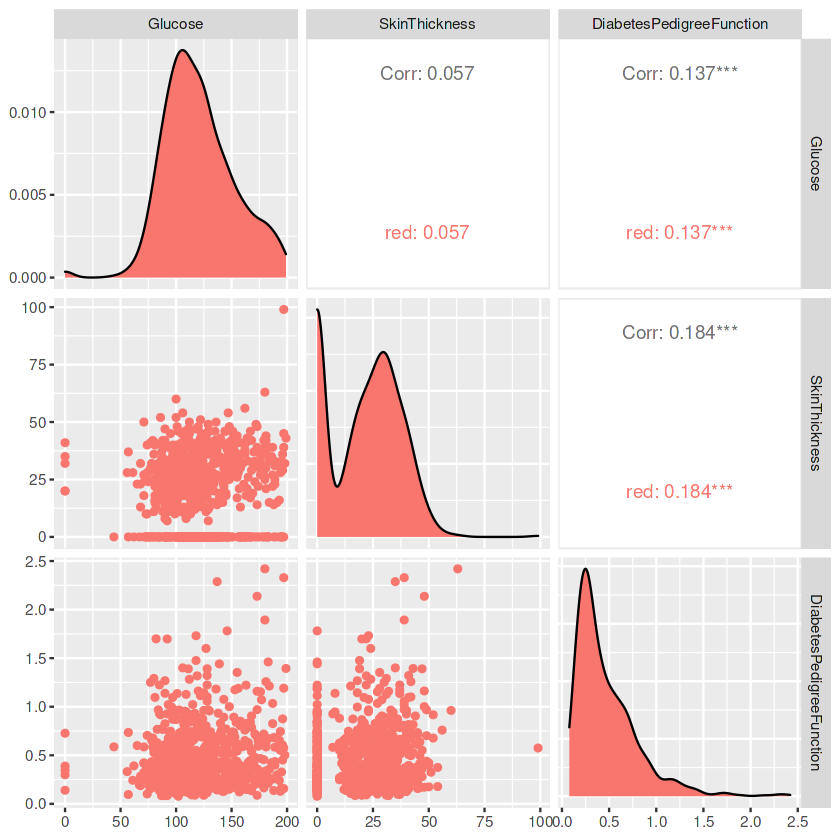

In [10]:


ggpairs(df,columns=c(2,4,7),aes(color='red'))

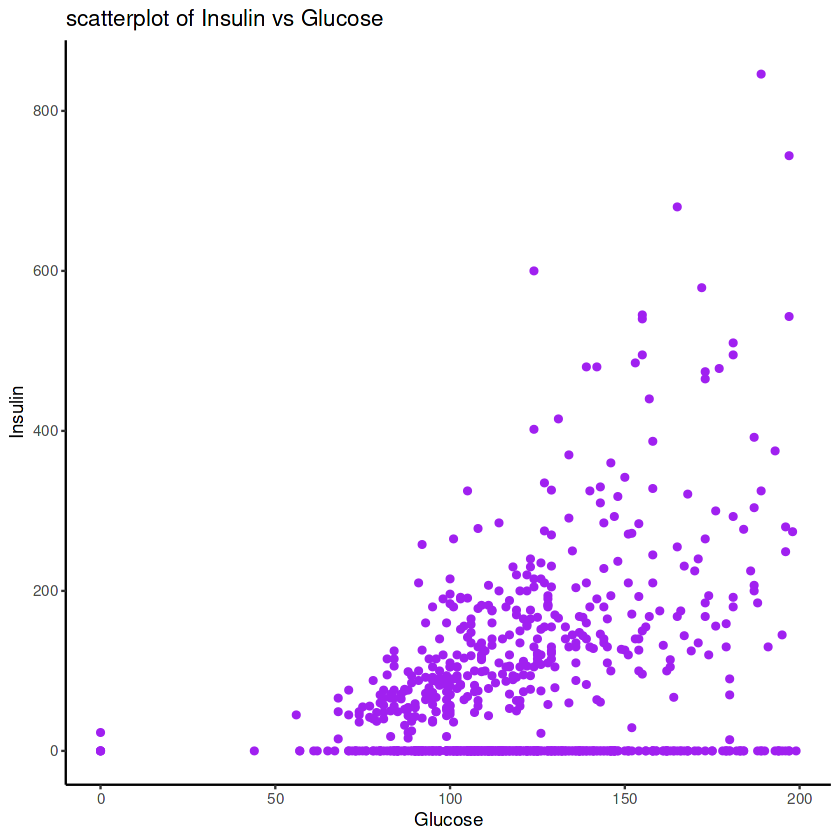

In [11]:
ggplot(df,aes(x=Glucose,y=Insulin))+
       geom_point(color='purple')+
       labs(title='scatterplot of Insulin vs Glucose')+
       theme_classic()

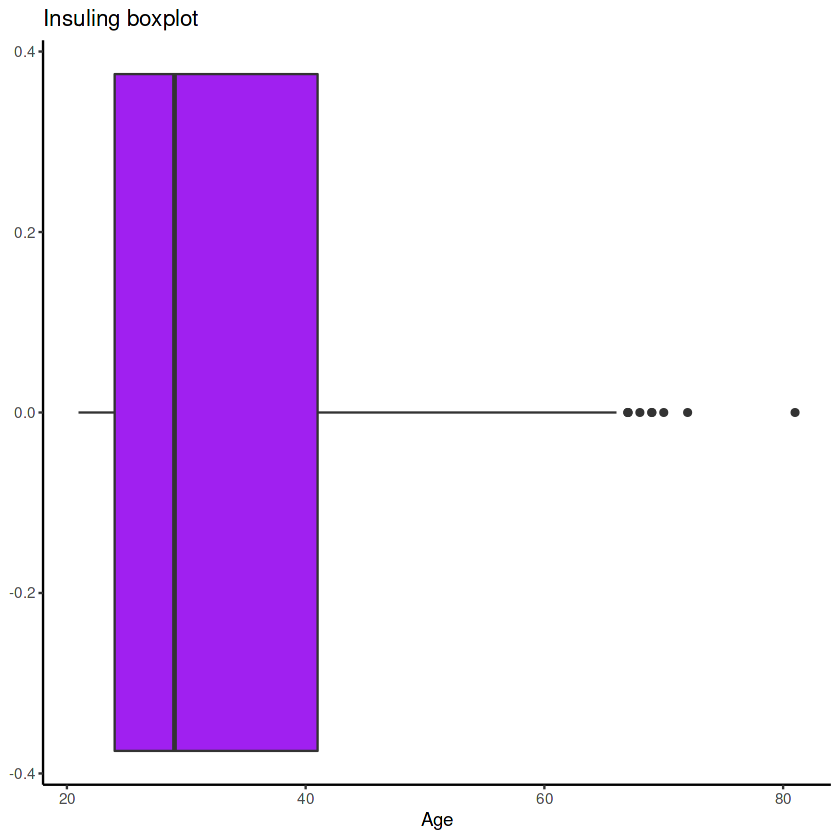

In [12]:
ggplot(df,aes(x=Age))+
       geom_boxplot(fill='purple')+
       labs(title='Insuling boxplot')+
       theme_classic()

In [13]:
df$Outcome<- as.factor(df$Outcome)

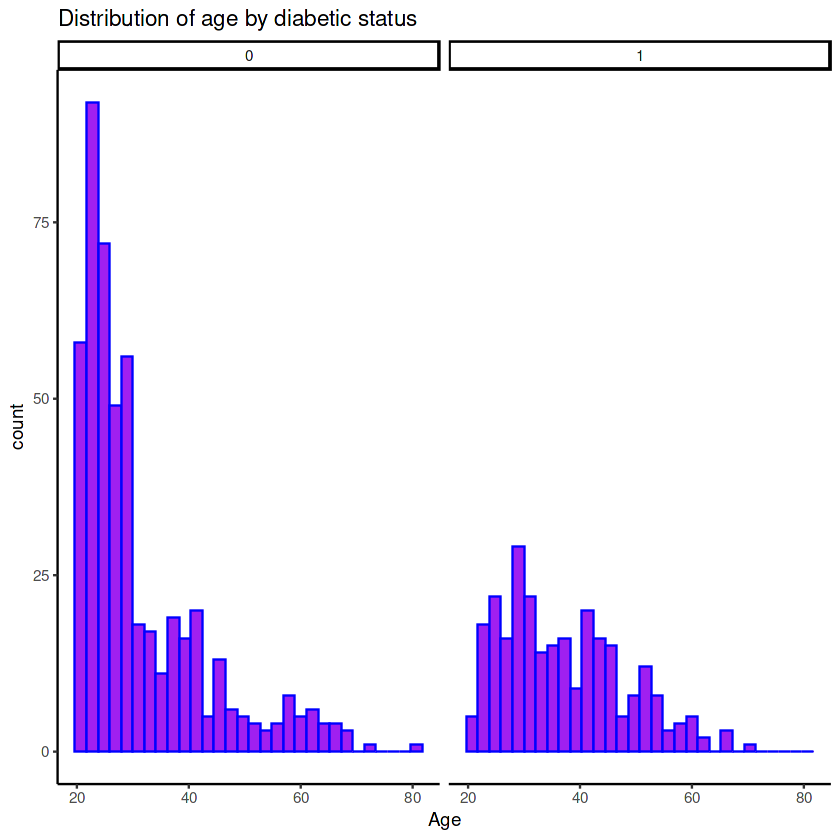

In [14]:
ggplot(df,aes(x=Age))+
       geom_histogram(color='blue',fill='purple',bins=30)+
       labs(title='Distribution of age by diabetic status')+
       facet_wrap(~Outcome)+
       theme_classic()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



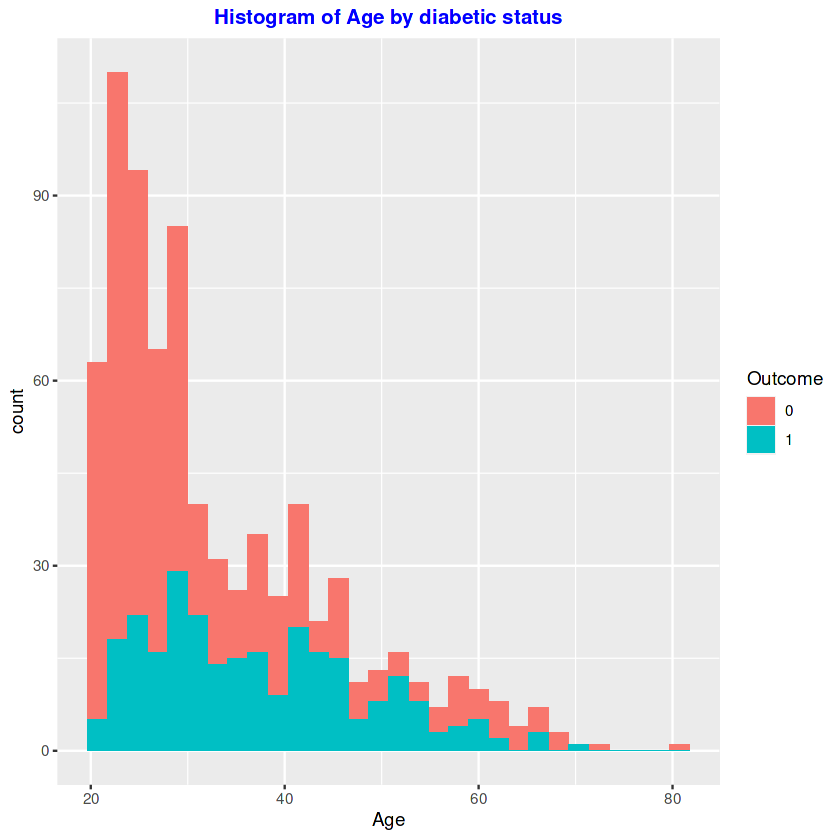

In [15]:
ggplot(df,aes(x=Age,fill=Outcome))+
       geom_histogram()+
       labs(title='Histogram of Age by diabetic status')+
       theme(plot.title=element_text(color='blue',size=12,face='bold',hjust=0.5))


**Classification:Neural networks**

**i.Scale data**

In [16]:
scale <- preProcess(df, method=c("range")) #min-max normalization
df_scale <- predict(scale,df)

**ii.Splitting data**

In [17]:
set.seed(2)
train_idx <- sample(nrow(df_scale), 2/3 * nrow(df_scale))
df_train <- df_scale[train_idx, ]
df_test <- df_scale[-train_idx, ]


In [18]:
summary(df_train$Outcome)

0   1 
332 180

In [19]:
summary(df_test$Outcome)

0   1 
168  88

**iii.Neural network**

In [20]:
set.seed(2)

In [21]:
model<-neuralnet(Outcome~., df_train, hidden = 5,threshold = 0.01,stepmax=1e6,
err.fct="sse",rep = 2, linear.output=TRUE)


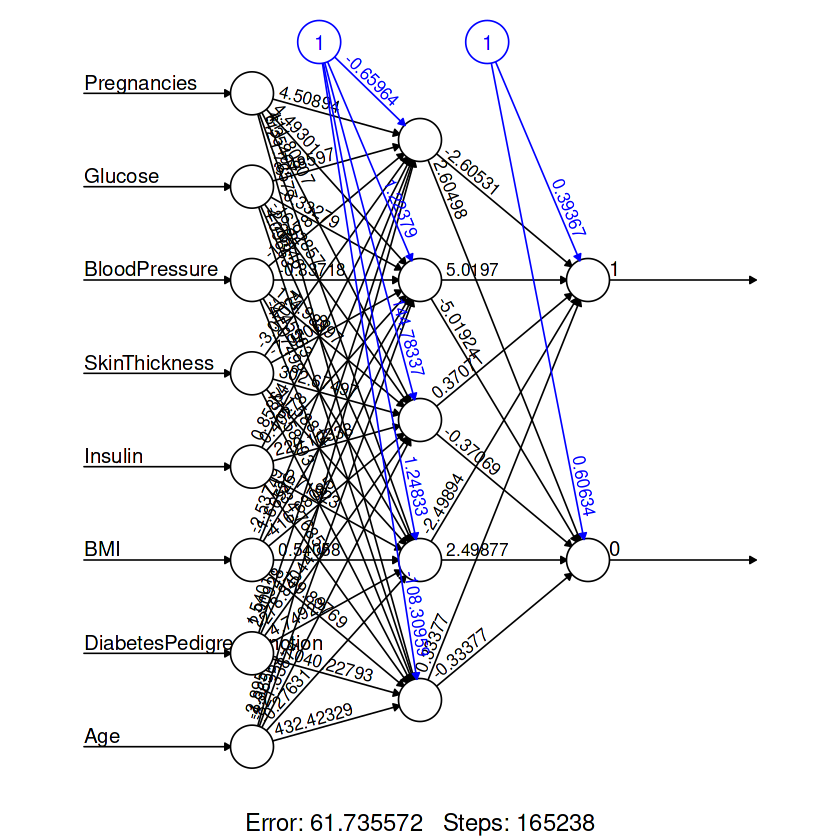

In [22]:
plot(model, rep="best")                                   #visualization

In [23]:
model$result.matrix                 

error,6.264211e+01,6.173557e+01
reached.threshold,9.684758e-03,9.430561e-03
steps,3.154500e+04,1.652380e+05
Intercept.to.1layhid1,3.530799e+00,-6.596448e-01
Pregnancies.to.1layhid1,-1.545906e+00,4.508943e+00
Glucose.to.1layhid1,1.014906e+00,3.485965e+00
BloodPressure.to.1layhid1,-5.432329e-01,-1.597868e+00
SkinThickness.to.1layhid1,5.783655e+00,-3.070243e+00
Insulin.to.1layhid1,-3.702860e+00,8.586439e-01
BMI.to.1layhid1,-3.678216e+00,-2.537490e+00
DiabetesPedigreeFunction.to.1layhid1,-2.627001e+00,1.540113e+00


**iv.Prediction on test data**

In [24]:
pred <- predict(model, df_test,all.units=FALSE)
table(df_test$Outcome, apply(pred, 1, which.max))

   
      1   2
  0 145  23
  1  34  54

True negatives:143
True positives: 50


**END**